In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv("../DSML25/Google_Stock_Price_Train.csv")
df_test=pd.read_csv("../DSML25/Google_Stock_Price_Test.csv")

In [5]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [7]:
df_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[['Open']])
X_train_scaled = scaler.transform(df_train[['Open']])

In [9]:
X_train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
import numpy as np
rows = []
y_train = []
for i in range(1198):
    row = X_train_scaled[i:60+i,0]
    rows.append(row)
    y_train.append(X_train_scaled[60+i,0])
X_train = np.array(rows)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [11]:
X_train = X_train.reshape(1198,60,1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [14]:
model.fit(X_train,y_train,batch_size=32, epochs=40)

Epoch 1/40
38/38 [==============================] - 23s 159ms/step - loss: 0.0278
Epoch 2/40
38/38 [==============================] - 5s 135ms/step - loss: 0.0099
Epoch 3/40
38/38 [==============================] - 5s 123ms/step - loss: 0.0074
Epoch 4/40
38/38 [==============================] - 5s 126ms/step - loss: 0.0070
Epoch 5/40
38/38 [==============================] - 6s 151ms/step - loss: 0.0055
Epoch 6/40
38/38 [==============================] - 6s 151ms/step - loss: 0.0059
Epoch 7/40
38/38 [==============================] - 4s 106ms/step - loss: 0.0050
Epoch 8/40
38/38 [==============================] - 5s 130ms/step - loss: 0.0046
Epoch 9/40
38/38 [==============================] - 5s 122ms/step - loss: 0.0043
Epoch 10/40
38/38 [==============================] - 4s 108ms/step - loss: 0.0036
Epoch 11/40
38/38 [==============================] - 4s 112ms/step - loss: 0.0038
Epoch 12/40
38/38 [==============================] - 5s 132ms/step - loss: 0.0036
Epoch 13/40
38/38 [=====

In [15]:
X_test_scaled = scaler.transform(df_test[['Open']])
X_test_scaled

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [16]:
X_test = np.vstack([X_train_scaled[-60:], X_test_scaled])

In [17]:
X_test.shape

(80, 1)

In [18]:
rows = []
for i in range(20):
    row = X_test[i:60+i,0]
    rows.append(row)
X_test = np.array(rows)

X_test.shape

(20, 60)

In [19]:
X_test = X_test.reshape(20,60,1)

In [20]:
yp = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [21]:
yp

array([[0.9300278 ],
       [0.9282919 ],
       [0.92596513],
       [0.9233962 ],
       [0.92111033],
       [0.919755  ],
       [0.91971713],
       [0.920986  ],
       [0.9233781 ],
       [0.92658526],
       [0.93024   ],
       [0.933962  ],
       [0.93742746],
       [0.94046265],
       [0.94298995],
       [0.9453774 ],
       [0.94808006],
       [0.95153296],
       [0.9557824 ],
       [0.9601359 ]], dtype=float32)

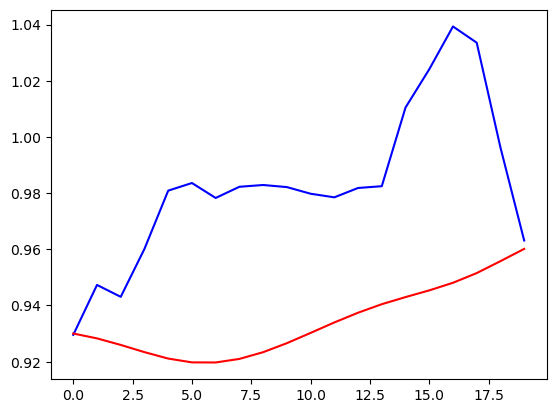

In [22]:
plt.plot(X_test_scaled,c='blue')
plt.plot(yp,c='red')